In [119]:
import numpy as np 
%pip install plotly==5.8.0
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import seaborn as sb
import statsmodels.api as sm
import plotly.express as px

%pip install kaleido
import kaleido

from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
import plotly.io as pio
pio.renderers.default = "svg"


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [120]:
dt = pd.read_csv('ElectricCar.csv')

In [121]:
dt

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6000,233,460,70.0000,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0000,160,270,45.0000,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7000,210,400,75.0000,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8000,180,360,74.0000,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5000,145,170,28.5000,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Nissan,Ariya 63kWh,7.5000,160,330,63.0000,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
98,Audi,e-tron S Sportback 55 quattro,4.5000,210,335,86.5000,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
99,Nissan,Ariya e-4ORCE 63kWh,5.9000,200,325,63.0000,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
100,Nissan,Ariya e-4ORCE 87kWh Performance,5.1000,200,375,87.0000,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [122]:
dt.isnull().sum()

Brand               0
Model               0
AccelSec            0
TopSpeed_KmH        0
Range_Km            0
Battery_Pack Kwh    0
Efficiency_WhKm     0
FastCharge_KmH      0
RapidCharge         0
PowerTrain          0
PlugType            0
BodyStyle           0
Segment             0
Seats               0
PriceEuro           0
dtype: int64

In [123]:
dt.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Battery_Pack Kwh', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge',
       'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [124]:
# converting euro to INR
dt['inr(10e3)'] = dt['PriceEuro']*0.08320

In [125]:
dt['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

In [126]:
dt.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6000,233,460,70.0000,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
1,Volkswagen,ID.3 Pure,10.0000,160,270,45.0000,167,250,1,RWD,Type 2 CCS,Hatchback,C,5,30000,2496.0000
2,Polestar,2,4.7000,210,400,75.0000,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4695.8080
3,BMW,iX3,6.8000,180,360,74.0000,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
4,Honda,e,9.5000,145,170,28.5000,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,2745.3504


In [127]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             102 non-null    object 
 1   Model             102 non-null    object 
 2   AccelSec          102 non-null    float64
 3   TopSpeed_KmH      102 non-null    int64  
 4   Range_Km          102 non-null    int64  
 5   Battery_Pack Kwh  102 non-null    float64
 6   Efficiency_WhKm   102 non-null    int64  
 7   FastCharge_KmH    102 non-null    int64  
 8   RapidCharge       102 non-null    int64  
 9   PowerTrain        102 non-null    object 
 10  PlugType          102 non-null    object 
 11  BodyStyle         102 non-null    object 
 12  Segment           102 non-null    object 
 13  Seats             102 non-null    int64  
 14  PriceEuro         102 non-null    int64  
 15  inr(10e3)         102 non-null    float64
dtypes: float64(3), int64(7), object(6)
memory us

In [128]:
dt.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro,inr(10e3)
count,102.0000,102.0000,102.0000,102.0000,102.0000,102.0000,102.0000,102.0000,102.0000,102.0000
mean,7.3912,179.3137,338.6275,65.4157,189.3039,435.6863,0.9510,4.8824,55997.5882,4658.9993
std,3.0319,43.7712,126.7006,29.9558,29.6791,220.4474,0.2170,0.7997,34250.7244,2849.6603
min,2.1000,123.0000,95.0000,16.7000,104.0000,0.0000,0.0000,2.0000,20129.0000,1674.7328
25%,5.1000,150.0000,250.0000,43.1250,168.0000,260.0000,1.0000,5.0000,34414.7500,2863.3072
50%,7.3000,160.0000,340.0000,64.3500,180.5000,440.0000,1.0000,5.0000,45000.0000,3744.0000
75%,9.0000,200.0000,400.0000,83.7000,204.5000,557.5000,1.0000,5.0000,65000.0000,5408.0000
max,22.4000,410.0000,970.0000,200.0000,273.0000,940.0000,1.0000,7.0000,215000.0000,17888.0000


In [129]:
dt.shape

(102, 16)

In [130]:
dt.duplicated().sum()

0

In [134]:
dt['RapidCharge'].replace(to_replace = ['No' , 'Yes'] , value = [0 , 1] , inplace = True)

In [135]:
dt_sortedPrice = dt.sort_values('inr(10e3)')

In [ ]:
# Brand with low price

fig = px.bar(dt_sortedPrice , x = 'Brand' , y = 'inr(10e3)' , color = 'Brand' , title = 'Car Price Low to High')
fig.show()
     

In [34]:

# Brand has top speed

fig = px.bar(dt , x = 'Brand' , y = 'TopSpeed_KmH' , color = 'Brand' , title = 'Top Speed')
fig.show()
     

In [ ]:
# Brand with fast charge

fig = px.bar(dt , x = 'Brand' , y = 'FastCharge_KmH' , color = 'Brand' , title = 'Fast Charge')
fig.show()

In [ ]:
# brands with rapid charge
fig = px.bar(dt , x = 'Brand' , y = 'RapidCharge' , color = 'Brand' , title = 'Cars having Rapid Charging')
fig.show()

In [ ]:
# brands with the fastest acceleration
fig = px.bar(dt , x = 'Brand' , y = 'AccelSec' , color = 'Brand',  title = 'Fastest Acceleration')
fig.show()

In [ ]:
dt.drop('PriceEuro' , axis = 1 , inplace = True)

In [ ]:
# Pairplot of all the features based on price of the car

sn.pairplot(dt , hue = 'inr(10e3)')

In [ ]:
dt['inr(10e3)'].plot(figsize = (12,8),title='Car Price',xlabel = 'No. of Samples',ylabel = 'Car Price',color = 'red')

In [ ]:
# plotting heatmap to show correlation among the features

sn.heatmap(dt.corr() , annot = True)

In [ ]:
fig = px.pie(dt,names = 'Brand',values = 'inr(10e3)')
pio.show(fig)

In [ ]:
fig = px.scatter(dt,x = 'Brand',y = 'Range_Km',size='Seats',color = 'Brand',hover_data=['RapidCharge','inr(10e3)'])
pio.show(fig)

In [ ]:
a = np.arange(0 , 102)

In [ ]:
dt.shape

In [ ]:
# Making comparison from the dataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla'),
  Text(1, 0, 'Volkswagen'),
  Text(2, 0, 'Polestar'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Lucid'),
  Text(6, 0, 'Peugeot'),
  Text(7, 0, 'Audi'),
  Text(8, 0, 'Mercedes'),
  Text(9, 0, 'Nissan'),
  Text(10, 0, 'Hyundai'),
  Text(11, 0, 'Porsche'),
  Text(12, 0, 'MG'),
  Text(13, 0, 'Mini'),
  Text(14, 0, 'Opel'),
  Text(15, 0, 'Skoda'),
  Text(16, 0, 'Volvo'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Renault'),
  Text(19, 0, 'Mazda'),
  Text(20, 0, 'Lexus'),
  Text(21, 0, 'CUPRA'),
  Text(22, 0, 'SEAT'),
  Text(23, 0, 'Lightyear'),
  Text(24, 0, 'Aiways'),
  Text(25, 0, 'DS'),
  Text(26, 0, 'Citroen'),
  Text(27, 0, 'Jaguar'),
  Text(28, 0, 'Ford'),
  Text(29, 0, 'Byton'),
  Text(30, 0, 'Sono'),
  Text(31, 0, 'Smart'),
  Text(32, 0, 'Fiat')])

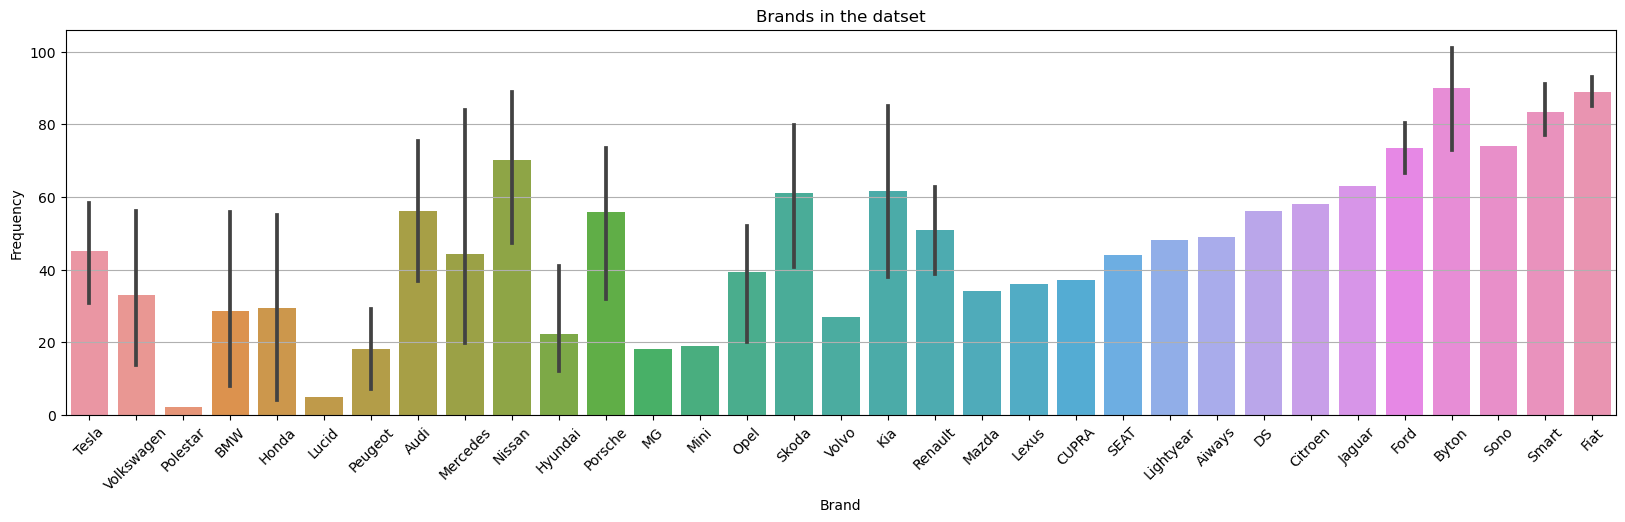

In [57]:
# Plotting the frequencies of the brand in the dataset

plt.figure(figsize = (20 , 5))
sn.barplot(x = 'Brand',y = a,data =dt)
plt.grid(axis = 'y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)

In [58]:
# Byton , Fiat and Smart have the more frequecy and Polester being the least

In [ ]:
# Plotting which car have the best efficency
plt.figure(figsize = (20 , 5))
sn.barplot(x = 'Brand' , y = 'Efficiency_WhKm' , data = dt)
plt.title('Efficiency')
plt.xlabel('Brand')
plt.ylabel('Efficiency_WhKm')
plt.xticks(rotation = 45)

In [60]:
# Efficiency is best in Byton , Jaguar and Audi and least is Lightyear

In [ ]:
plt.figure(figsize = (20 , 5))
sn.barplot(x = 'Brand' , y = 'Seats' , data = dt)
plt.title('Seats in a Car')
plt.xlabel('Brands')
plt.ylabel('No. of Seats')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# Majority of cars have 5 seats

Text(0.5, 1.0, 'Body Style')

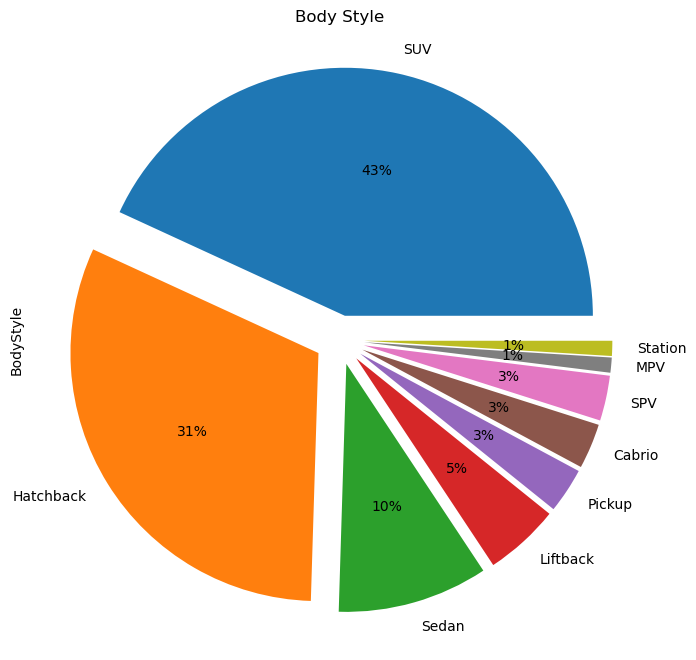

In [64]:
dt['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

In [65]:
# SUV and Hatchback are popular among the customer

Text(0.5, 1.0, 'Segment')

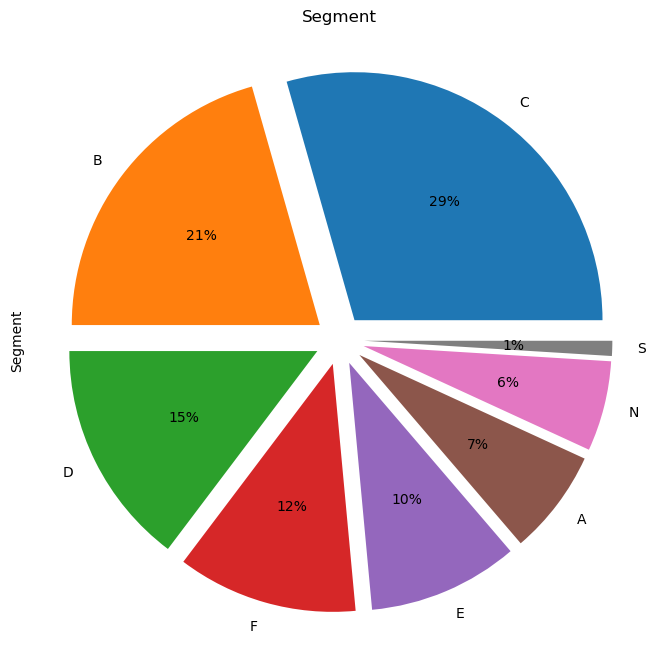

In [66]:
dt['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

In [67]:
# Most segments are in B and C

Text(0.5, 1.0, 'No. of Seats')

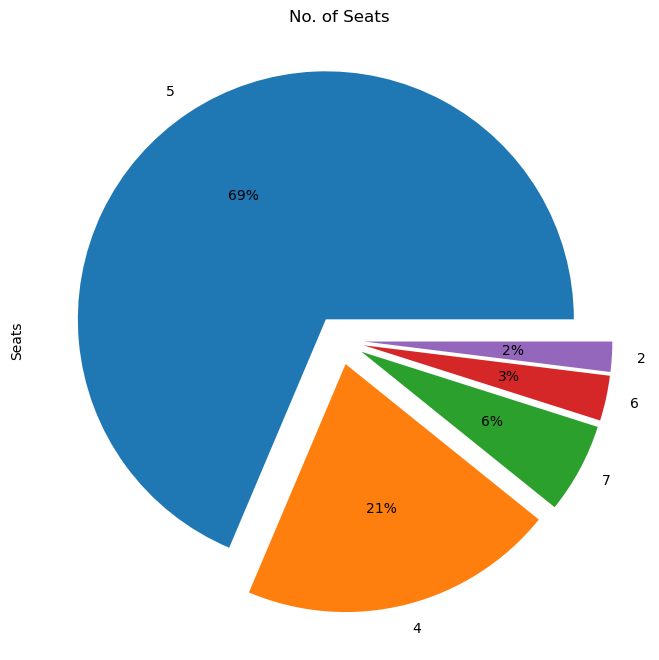

In [68]:
dt['Seats'].value_counts().plot.pie(figsize = (8,15) , autopct = '%0.f%%' , explode = (0.1,0.1,0.1,0.1,0.1))
plt.title("No. of Seats")

In [ ]:
# 5 seats are most prefferable

In [ ]:
# 1. Linear Regression
dt['PowerTrain'].replace(to_replace = ['RWD' , 'FWD' , 'AWD'] , value = [0 , 1 , 2] , inplace = True)

X = dt[['AccelSec' , 'TopSpeed_KmH' , 'Range_Km' , 'Efficiency_WhKm' , 'RapidCharge' , 'PowerTrain']]
Y = dt['INR']

In [ ]:
# Finding linear regression using ols method
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y , X)
     

In [ ]:
models = results.fit()
models.summary()

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train , Y_train)
pred = lr.predict(X_test)

In [ ]:
# R2 Score
from sklearn.metrics import accuracy_score , r2_score

r2_scoree = r2_score(Y_test , pred)
r2_scoree *100


In [77]:
# Around 53% of the dependant variable has been explained by the independant variables

In [ ]:
# 2. Logistic Regression

X1 = dt[['inr(10e3)']]
Y1 = dt[['RapidCharge']]

In [ ]:
X1_train , X1_test , Y1_train , Y1_test = train_test_split(X1 , Y1 , test_size = 0.2 , random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()

lor.fit(X1_train , Y1_train)
pred =  lor.predict(X1_test)
pred

In [ ]:
# CLUSTERING
plt.subplots(figsize = (15 , 8))
sn.stripplot(x = 'TopSpeed_KmH' , y = 'FastCharge_KmH' , data = dt , hue = 'FastCharge_KmH' ,  legend = True , jitter = True)
plt.show()

In [ ]:
plt.subplots(figsize = (15 , 8))
sn.stripplot(x = 'TopSpeed_KmH' , y = 'Efficiency_WhKm' , data = dt , hue = 'Efficiency_WhKm')

In [ ]:
# Applying PCA for dimension reduction

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = ['AccelSec' , 'TopSpeed_KmH' , 'Range_Km' , 'Efficiency_WhKm' , 'FastCharge_KmH' , 'RapidCharge' , 'PowerTrain' , 'Seats' , 'inr(10e3)']

x = dt.loc[: , x].values
x = StandardScaler().fit_transform(x)


In [84]:
pca = PCA(n_components = 9)

s = pca.fit_transform(x)

dt1 = pd.DataFrame(s, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
dt1

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.342036,0.254881,-1.297001,-0.569622,0.770965,-1.304321,0.401787,-0.762618,-0.354884
1,-1.914561,-0.569047,-0.709043,0.593886,0.206999,0.352992,-0.397134,0.238896,-0.325262
2,1.515695,0.024369,-0.382073,-0.679665,0.107532,-0.729073,0.266925,0.042262,-0.087392
3,0.252431,-0.104398,-0.257001,1.601049,-0.142045,0.190743,-0.412853,-0.301661,0.185571
4,-2.561396,0.254023,-0.791450,0.322643,-0.893104,0.348270,-0.495068,0.109750,-0.165978
...,...,...,...,...,...,...,...,...,...
97,-0.305650,-0.460376,-0.075838,0.164252,-0.163668,-0.041783,0.151686,-0.126566,0.132994
98,2.231842,0.177451,1.792758,0.158852,-1.120332,0.077190,-0.342025,-0.091941,0.101495
99,0.739027,-0.181728,0.277008,-0.811593,-0.287049,-0.448344,0.056445,0.286306,-0.265459
100,1.476350,-0.129236,1.151317,-0.179274,-0.719638,-0.118880,0.269224,0.310137,-0.101881


In [ ]:
dt1.head()

In [ ]:
# Finding the correlation coefficient between the original variable and the components

loadings = pca.components_
features = pca.n_features_
pc = ['PC' + str(i) for i in list(range(1 , features + 1))]
loadings_dt = pd.DataFrame.from_dict(dict(zip(pc , loadings)))
loadings_dt['Variable'] = dt1.columns.values
loadings_dt = loadings_dt.set_index('Variable')
loadings_dt

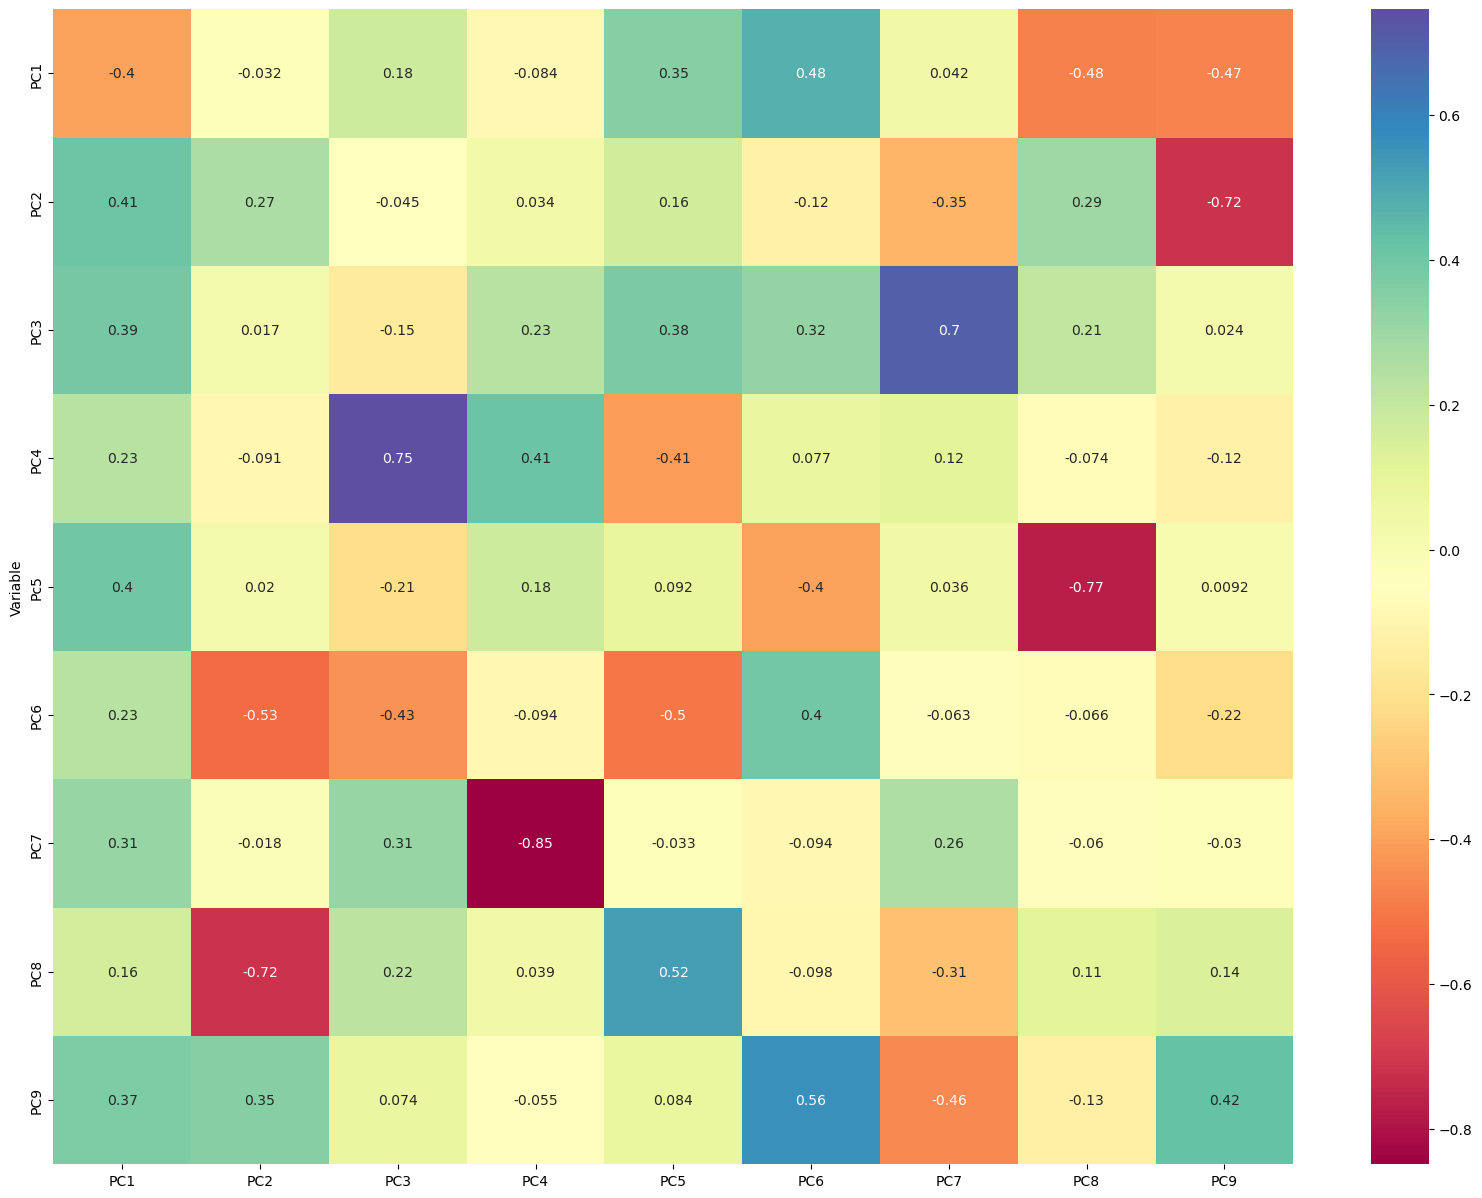

In [88]:
# Correlation matrix through heatmap
plt.rcParams['figure.figsize'] = (20 , 15)
sn.heatmap(loadings_dt , annot = True , cmap = 'Spectral')
plt.show()

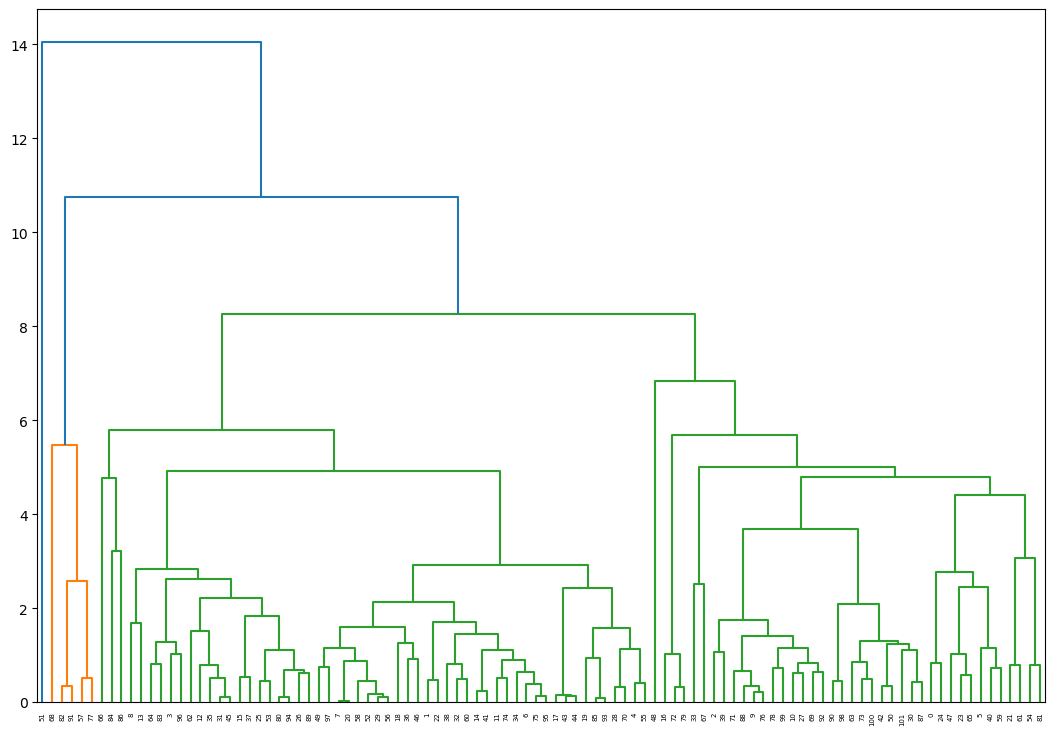

In [89]:
from scipy.cluster.hierarchy import linkage , dendrogram

linkage = linkage(dt1 , 'complete')
plt.figure(figsize = (13 , 9))
dendrogram(linkage , orientation = 'top')
plt.show()

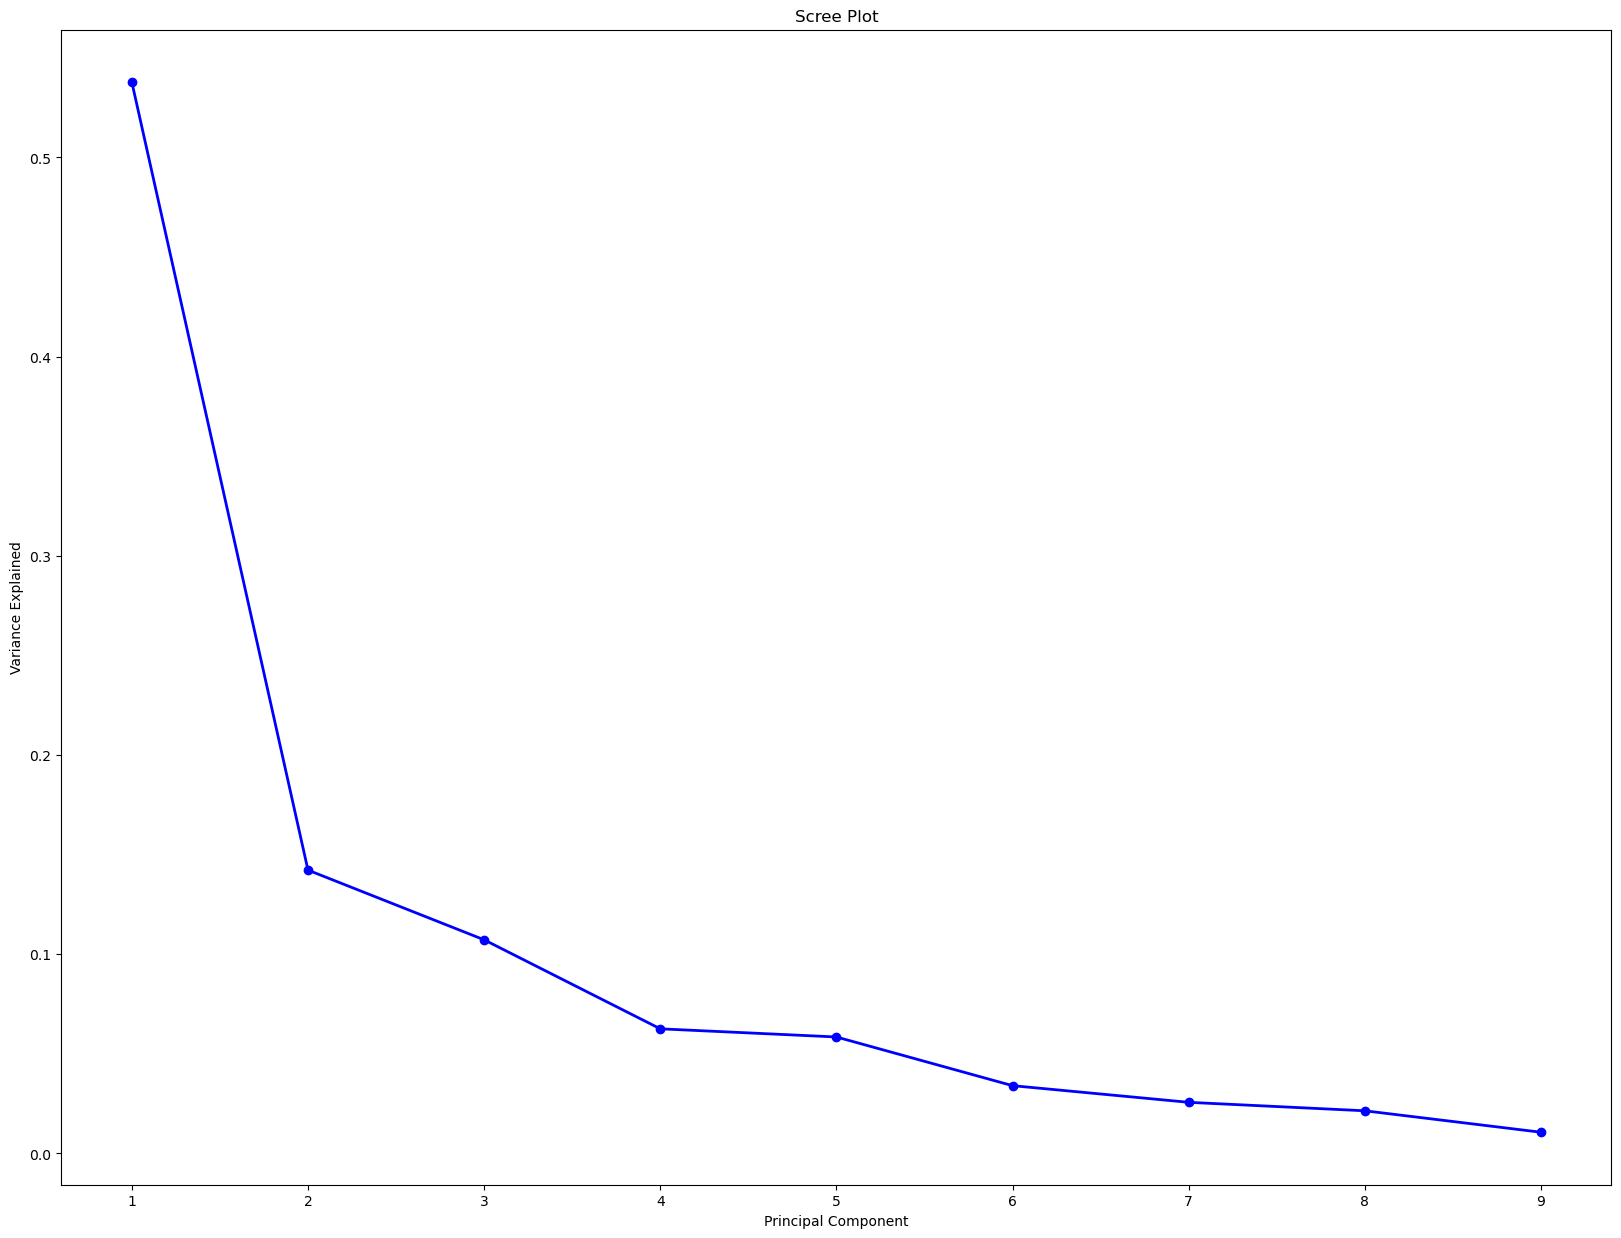

In [90]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values , pca.explained_variance_ratio_ , 'o-' , linewidth = 2 , color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [91]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4 , random_state = 1234)

kmeans.fit(s)

labels = kmeans.labels_

centroid = kmeans.cluster_centers_

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [92]:
print('labels')
print(labels)
print()
print('centers of cluster')
print(centroid)
     

labels
[3 1 0 1 1 3 1 1 1 0 0 1 1 1 1 1 3 1 1 1 1 0 1 3 3 1 1 0 1 1 0 1 1 0 1 1 1
 1 1 0 3 1 0 1 1 1 1 3 3 1 0 3 1 1 0 1 1 2 1 3 1 0 1 0 1 3 1 0 2 0 1 0 3 0
 1 1 0 2 0 3 1 0 2 1 0 1 0 0 0 1 0 2 0 1 1 1 1 1 0 0 0 0]

centers of cluster
[[ 1.53857250e+00 -4.87147645e-01  8.38904255e-01 -1.49374283e-01
  -1.19973613e-01 -2.01792533e-01  1.54651343e-01  4.26746932e-02
   3.68164416e-02]
 [-1.17713636e+00 -3.61061710e-01 -4.97293199e-01  1.52024268e-01
  -9.90815172e-02  1.23366178e-01 -4.25958898e-02  1.53024383e-02
  -2.91647221e-02]
 [-4.96071318e+00  3.00886242e+00  1.84767463e+00  2.33687384e-01
   1.15965673e+00 -5.33637458e-01  6.41036687e-02  5.58254396e-02
   9.24342788e-02]
 [ 3.24705804e+00  1.46672689e+00 -5.80897543e-01 -3.76655298e-01
   2.42409744e-01  1.58476129e-01 -2.04606200e-01 -1.83515359e-01
   6.33103758e-04]]


In [93]:
from collections import Counter

Counter(kmeans.labels_) ## to see the cluster size

Counter({3: 13, 1: 54, 0: 30, 2: 5})

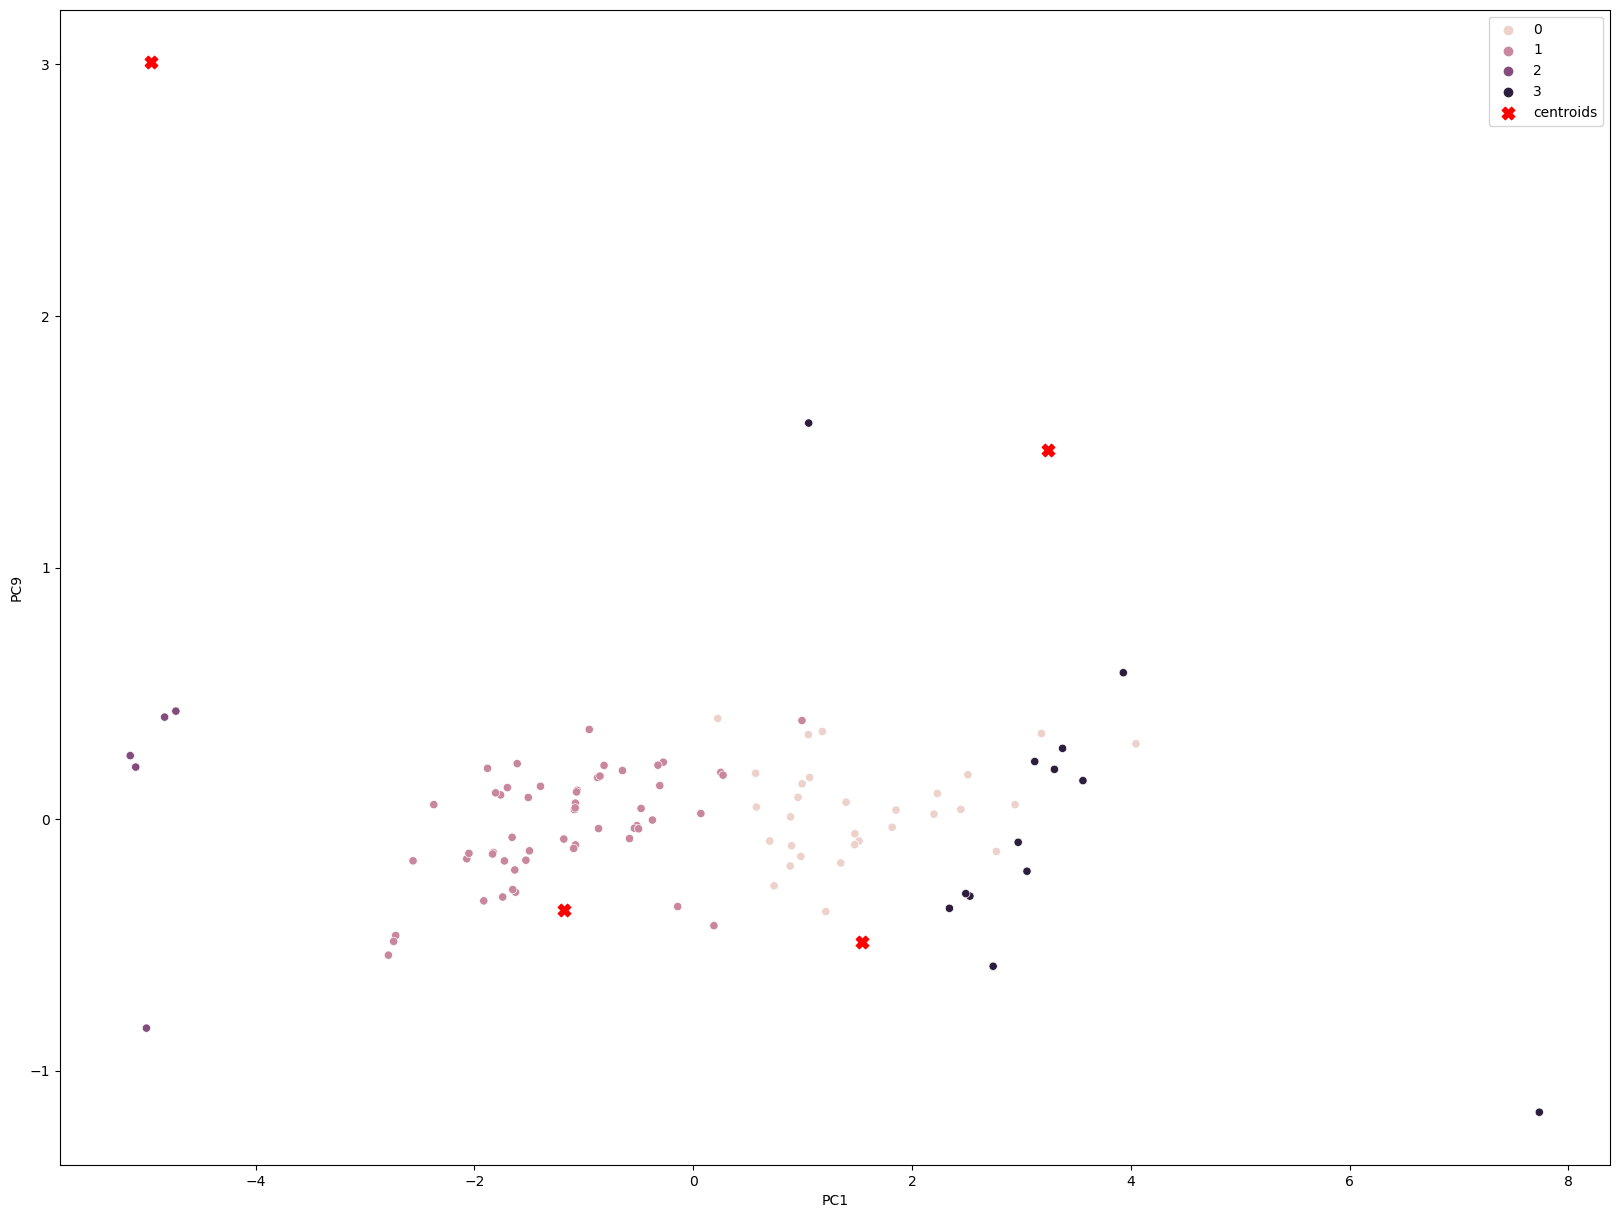

In [94]:
sn.scatterplot(data = dt1, x="PC1", y="PC9", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [95]:
# Applying LINEAR REGRESSION in the PCA data on the basis of COST


In [96]:
X = dt1
Y = dt['INR']

In [97]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.4 , random_state = 42)


In [98]:
lr = LinearRegression()
lr.fit(X_train , Y_train)
pred = lr.predict(X_test)

In [99]:

pred

array([ 6064550.5868    ,  4951903.        ,  4501730.        ,
        9268611.897     ,  7350334.7094    ,  7201867.654     ,
        8445245.48      ,  3316604.5602    ,  6255964.1464    ,
        4995119.608     ,  2701038.        ,  3430768.433     ,
        4051557.        ,  3142207.54      ,  5176989.5       ,
        2970871.6962    , 13352221.2146    ,  6752595.        ,
        3672961.507     ,  2971141.8       ,  5852249.        ,
        3601384.        ,  3151211.        ,  3421314.8       ,
        1812306.4634    ,  8647823.33      ,  3685656.3856    ,
        5762214.4       ,  4051557.        ,  4951903.        ,
        6359233.8326    ,  2632071.4964    ,  5582145.2       ,
        3234132.8666    ,  3422845.3882    ,  4904634.835     ,
        9453633.        ,  4861868.4       ,  9840961.8492    ,
        3352618.4002    , 16276545.02260001])

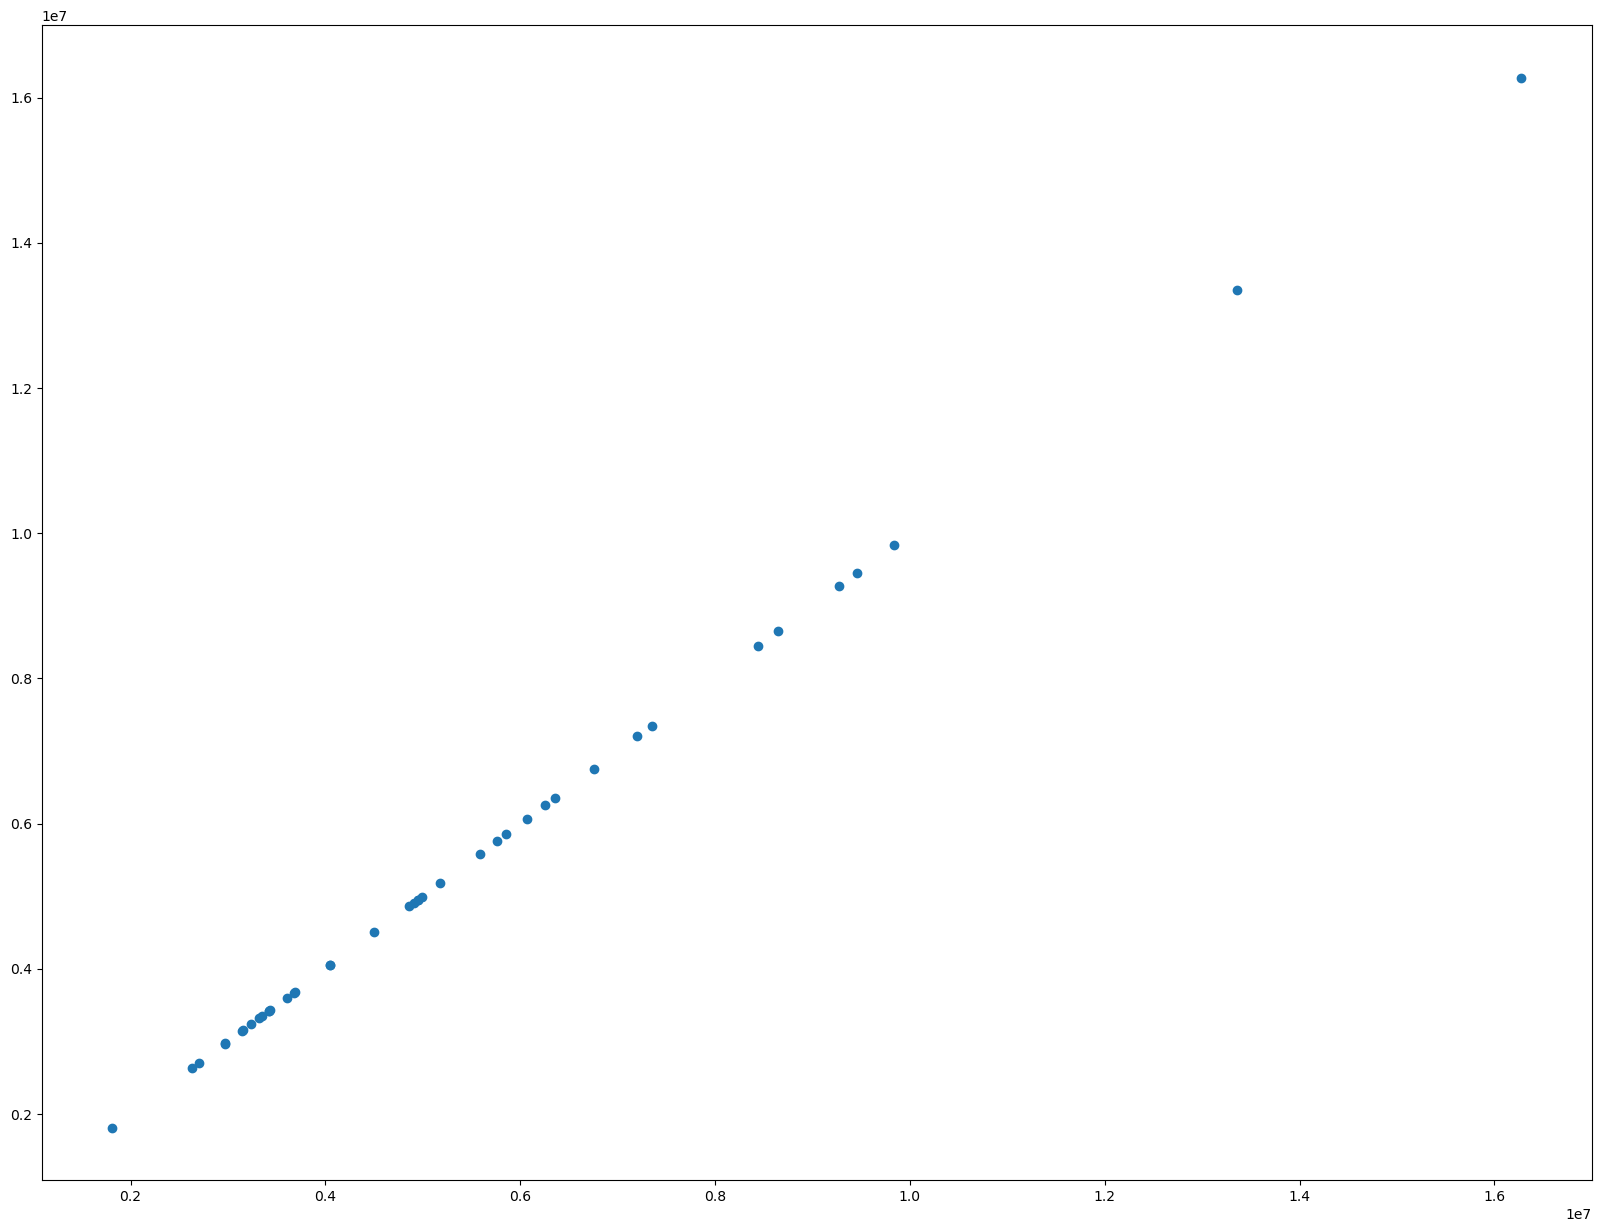

In [100]:

plt.scatter(Y_test , pred)

C:\Users\DAIDIPYA SISODIYA\AppData\Local\Temp\ipykernel_8800\32035590.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='INR', ylabel='Density'>

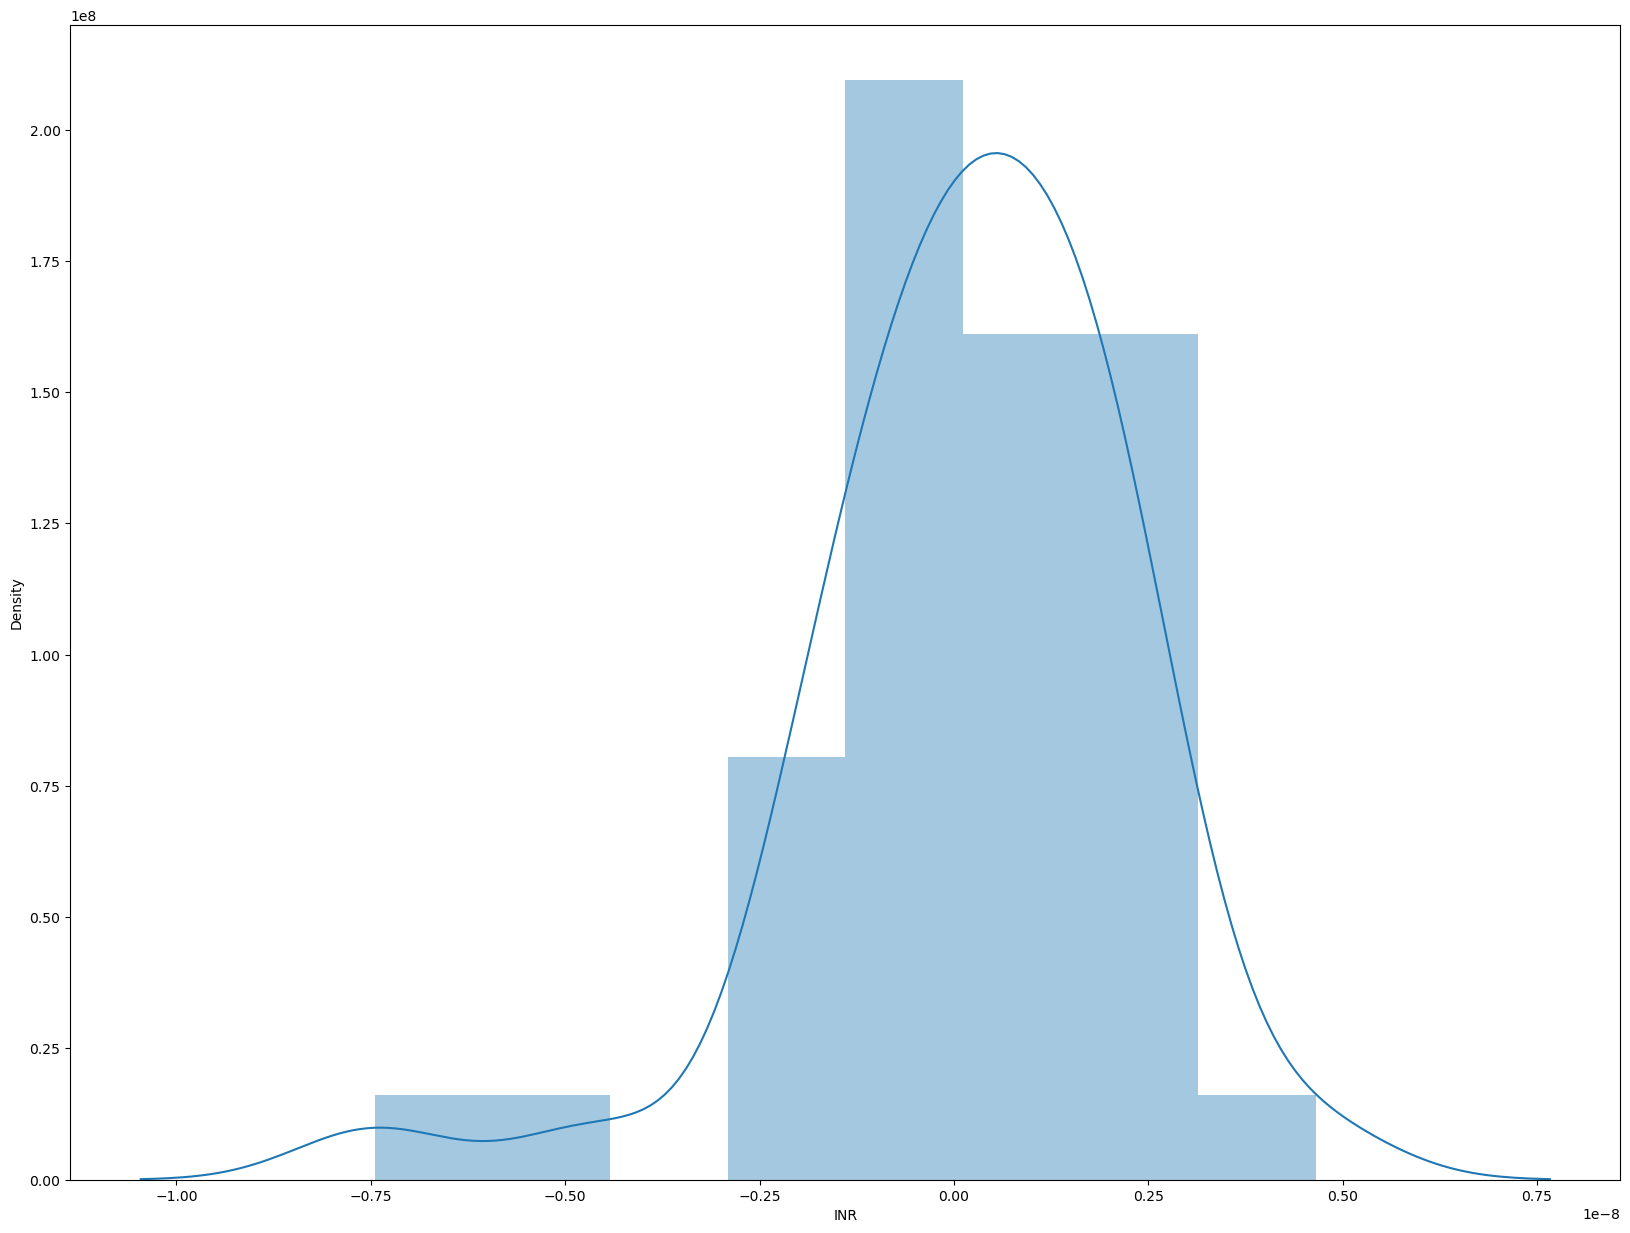

In [101]:

sn.distplot((Y_test-pred))

In [109]:
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score

In [113]:
print('MAE:',metrics.mean_absolute_error(Y_test,pred))
print('MSE:',metrics.mean_squared_error(Y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,pred)))

MAE: 1.5275961742168519e-09
MSE: 4.380441216395703e-18
RMSE: 2.0929503616654895e-09


In [114]:
metrics.mean_absolute_error(Y_test,pred)

1.5275961742168519e-09

In [118]:
metrics.mean_squared_error(Y_test,pred)

4.380441216395703e-18

In [117]:
np.sqrt(metrics.mean_squared_error(Y_test,pred))

2.0929503616654895e-09